In [1]:
from autograd import grad
import autograd.numpy as np
import matplotlib.pyplot as plt
from lista import LISTA, make_loss
from functions import *
from generation import generate, get_lambda_max

In [2]:
n_train = 10000
n_test = 10000
k = 5
p = 10
rng = np.random.RandomState(0)

fit_loss = 'l2'
reg = 'l1'

fit_function, der_function = {
                              'l2': (l2_fit, l2_der),
                              'logreg': (logreg_fit, logreg_der)
                              }[fit_loss]
reg_function, prox = {
                      'l2': (l2_pen, l2_prox),
                      'l1': (l1_pen, l1_prox),
                      None: (no_pen, no_prox)
                      }[reg]
loss = make_loss(fit_function, reg_function)

In [3]:
D, X_train, X_test = generate(p, k, n_test, n_train, binary= fit_loss == 'logreg', rng=rng)
X_train /= get_lambda_max(D, X_train, fit_loss, False)
X_test /= get_lambda_max(D, X_test, fit_loss, False)
lbda_max = get_lambda_max(D, X_train, fit_loss)
print(lbda_max)

1.0000000000000004


In [4]:
lbda_grid = lbda_max * np.linspace(0, 1, 50)
ista_exact = LISTA(D, lbda_grid, 1000, fit_loss, reg,
                   variables='both', learn_levels=True)
f_min_list = ista_exact.compute_loss(X_test)

KeyboardInterrupt: 

In [12]:
n_layers = 3
lbdas = [0.1, 0.95]
n_lbdas = len(lbdas)
lbda_weights = [1., 20.]

lista = LISTA(D, lbdas, n_layers, fit_loss, reg, variables='both', learn_levels=True,
              one_lbda_each=True, lbda_weights=lbda_weights)
print(lista.compute_loss(X_test))
lista.fit(X_train, l_rate=1e-1, max_iter=2001, verbose=100, backtrack=True)
print(lista.compute_loss(X_test))

[0.029253296362722465, 0.08948461494873879]
it 0, loss = 1.817e+00, grad_W = 8.95e-02, grad_l = 4.17e-01, l_rate = 1.00e-01
it 100, loss = 1.817e+00, grad_W = 3.54e-02, grad_l = 3.10e-02, l_rate = 1.25e-02
it 200, loss = 1.816e+00, grad_W = 3.05e-02, grad_l = 4.08e-02, l_rate = 6.25e-03
it 300, loss = 1.816e+00, grad_W = 3.09e-02, grad_l = 6.79e-02, l_rate = 6.25e-03
it 400, loss = 1.816e+00, grad_W = 2.94e-02, grad_l = 6.81e-02, l_rate = 6.25e-03
it 500, loss = 1.816e+00, grad_W = 2.06e-02, grad_l = 3.04e-03, l_rate = 3.13e-03
it 600, loss = 1.816e+00, grad_W = 3.04e-02, grad_l = 8.28e-02, l_rate = 6.25e-03
it 700, loss = 1.816e+00, grad_W = 2.86e-02, grad_l = 6.50e-02, l_rate = 6.25e-03
it 800, loss = 1.816e+00, grad_W = 2.70e-02, grad_l = 5.34e-02, l_rate = 6.25e-03
it 900, loss = 1.816e+00, grad_W = 3.05e-02, grad_l = 8.49e-02, l_rate = 6.25e-03
it 1000, loss = 1.816e+00, grad_W = 2.79e-02, grad_l = 6.90e-02, l_rate = 6.25e-03
it 1100, loss = 1.816e+00, grad_W = 3.27e-02, grad_l = 

In [6]:
the_lambda = 0.9
lista_one = LISTA(D, the_lambda, n_layers, fit_loss, reg, variables='both', learn_levels=True)
print(lista_one.compute_loss(X_test))
lista_one.fit(X_train, l_rate=1e-1, max_iter=2001, verbose=100, backtrack=True)
print(lista_one.compute_loss(X_test))

0.08910721179705672
it 0, loss = 8.902e-02, grad_W = 5.85e-03, grad_l = 3.59e-02, l_rate = 1.00e-01
it 100, loss = 8.899e-02, grad_W = 3.51e-04, grad_l = 2.99e-04, l_rate = 1.00e-01
it 200, loss = 8.899e-02, grad_W = 3.01e-04, grad_l = 4.25e-04, l_rate = 1.00e-01
it 300, loss = 8.899e-02, grad_W = 2.47e-04, grad_l = 1.66e-04, l_rate = 1.00e-01
it 400, loss = 8.899e-02, grad_W = 2.40e-04, grad_l = 2.93e-04, l_rate = 1.00e-01
it 500, loss = 8.899e-02, grad_W = 2.11e-04, grad_l = 1.79e-04, l_rate = 1.00e-01
it 600, loss = 8.899e-02, grad_W = 2.06e-04, grad_l = 2.14e-04, l_rate = 1.00e-01
it 700, loss = 8.899e-02, grad_W = 2.00e-04, grad_l = 2.10e-04, l_rate = 1.00e-01
it 800, loss = 8.899e-02, grad_W = 1.99e-04, grad_l = 2.59e-04, l_rate = 1.00e-01
it 900, loss = 8.899e-02, grad_W = 2.04e-04, grad_l = 3.43e-04, l_rate = 2.00e-01
it 1000, loss = 8.899e-02, grad_W = 1.98e-04, grad_l = 3.31e-04, l_rate = 2.00e-01
it 1100, loss = 8.899e-02, grad_W = 1.94e-04, grad_l = 3.25e-04, l_rate = 2.00e

In [16]:
ista = LISTA(D, lbdas, n_layers, fit_loss, reg, variables='both', learn_levels=True)

levels_function = {}
for algo, name in zip([ista, lista, lista_one], ['ista', 'lista', 'lista_one']):
    z_list = [algo.transform(X_test, lbda) for lbda in lbda_grid]
    levels_function[name] = np.array([loss(z, X_test, D, lbda) - f_min
                                        for z, lbda, f_min in zip(z_list, lbda_grid, f_min_list)])

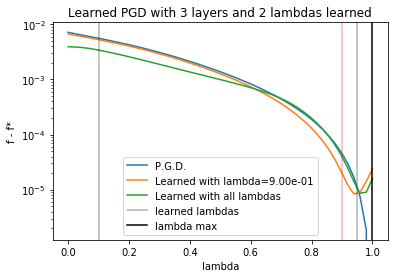

In [17]:
plt.loglog(lbda_grid, levels_function['ista'], label='P.G.D.')
plt.loglog(lbda_grid, levels_function['lista_one'] , label='Learned with lambda=%.2e' % the_lambda)
plt.loglog(lbda_grid, levels_function['lista'], label='Learned with all lambdas')
#plt.loglog(new_lbdas, levels_function['lista_one'] / levels_function['lista'], label='f_lista_one - f* / f_lista - f*')
for lbda in lbdas[:-1]:
    plt.axvline(lbda, c='k', alpha=0.3)
plt.axvline(lbdas[-1], c='k', alpha=0.3, label='learned lambdas')
plt.axvline(lbda_max, c='k', label='lambda max')
plt.axvline(the_lambda, c='r', alpha=0.3)
plt.xlabel('lambda')
plt.ylabel('f - f*')
plt.xscale('linear')
plt.title('Learned PGD with %d layers and %d lambdas learned' % (n_layers, n_lbdas))
plt.legend()
plt.savefig('multiple_lambdas.pdf')